## PROBLEM 1: Supervised Classification Libraries: Regression, Decision Tree 

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml, fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from ucimlrepo import fetch_ucirepo 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd

In [2]:
## MNIST
X_mnist, y_mnist = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X_mnist = X_mnist / 255.0  # Normalize
X_mnist_train, X_mnist_test, y_mnist_train, y_mnist_test = train_test_split(
    X_mnist, y_mnist, test_size=0.2, random_state=17
)

C:\Users\fred9\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
scaler = StandardScaler()
X_mnist_train_scaled = scaler.fit_transform(X_mnist_train)
X_mnist_test_scaled = scaler.transform(X_mnist_test)

In [4]:
#logistic regression
def lr_repot(X_train, y_train, X_test, y_test, feature_names=None):
    """
    Train a Logistic Regression model on the provided training data, evaluate it on the test data,
    and print the accuracy along with the top 30 features based on the average absolute coefficients.
    """
    # Initialize and train the logistic regression model
    lr_model = LogisticRegression(penalty='l2', max_iter=1000, random_state=17)
    lr_model.fit(X_train, y_train)
    
    # Compute the test accuracy
    accuracy = lr_model.score(X_test, y_test)
    print(f'Logistic Regression accuracy: {accuracy}')
    
    # Compute the average of absolute coefficients across all classes
    # This works for multiclass classification as well.
    coef_avg = np.mean(np.abs(lr_model.coef_), axis=0)
    
    # Identify the indices of the top 30 features (largest average absolute coefficient)
    top30_idx = np.argsort(coef_avg)[::-1][:30]
    
    # Print out the top 30 features and their weights
    print("\nWeight of top 30 Features:")
    for idx in top30_idx:
        # Use feature name if provided; otherwise use the index
        feature = feature_names[idx] if feature_names is not None else f"Feature {idx}"
        print(f'{feature}:  {coef_avg[idx]:.4f}')

In [5]:
#decision tree
def dt_report(X_train, y_train, X_test, y_test, feature_names=None):
    """
    Train a Decision Tree model on the provided training data, evaluate it on the test data,
    and print the accuracy along with the top 30 features based on feature importances.
    """
    # Initialize and train the decision tree classifier
    dt_model = DecisionTreeClassifier(random_state=17,max_depth=10)
    dt_model.fit(X_train, y_train)
    
    # Compute the test accuracy
    accuracy = dt_model.score(X_test, y_test)
    print(f'Decision Tree accuracy: {accuracy}')
    
    # Get feature importances from the trained model
    importances = dt_model.feature_importances_
    
    # Identify the indices of the top 30 features (largest importances)
    top30_idx = np.argsort(importances)[::-1][:30]
    
    # Print out the top 30 features and their importance values
    print("\nImportance of top 30 Features:")
    for idx in top30_idx:
        feature = feature_names[idx] if feature_names is not None else f"Feature {idx}"
        importance_value = importances[idx]
        print(f'{feature}: {importance_value:.4f}')

In [11]:
lr_repot(X_mnist_train, y_mnist_train, X_mnist_test, y_mnist_test)
dt_report(X_mnist_train, y_mnist_train,X_mnist_test,  y_mnist_test)

Logistic Regression accuracy: 0.9230714285714285

Top 30 Features:
Feature 360 has weight 1.0127
Feature 359 has weight 0.8710
Feature 248 has weight 0.8687
Feature 444 has weight 0.8452
Feature 304 has weight 0.8328
Feature 97 has weight 0.8231
Feature 388 has weight 0.7832
Feature 332 has weight 0.7464
Feature 276 has weight 0.7172
Feature 565 has weight 0.7148
Feature 249 has weight 0.7026
Feature 362 has weight 0.6967
Feature 96 has weight 0.6943
Feature 742 has weight 0.6851
Feature 501 has weight 0.6731
Feature 333 has weight 0.6687
Feature 368 has weight 0.6612
Feature 741 has weight 0.6611
Feature 452 has weight 0.6562
Feature 500 has weight 0.6507
Feature 620 has weight 0.6361
Feature 330 has weight 0.6359
Feature 554 has weight 0.6281
Feature 473 has weight 0.6245
Feature 416 has weight 0.6210
Feature 136 has weight 0.6187
Feature 277 has weight 0.6080
Feature 370 has weight 0.5916
Feature 472 has weight 0.5812
Feature 334 has weight 0.5767
Decision Tree accuracy: 0.873071428

In [12]:
## 20 newsgroups
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
vectorizer = TfidfVectorizer(max_features = 10000, stop_words='english')
X_20ng = vectorizer.fit_transform(newsgroups.data).toarray()
y_20ng = newsgroups.target
X_20ng_train, X_20ng_test, y_20ng_train, y_20ng_test = train_test_split(
    X_20ng, y_20ng, test_size=0.2, random_state=17
)
feature_names_20ng = vectorizer.get_feature_names_out()

In [25]:
feature_names_20ng

array(['00', '000', '005', ..., 'zv', 'zx', 'zz'], dtype=object)

In [13]:
#logistic regression
lr_repot(X_20ng_train, y_20ng_train, X_20ng_test, y_20ng_test,feature_names_20ng)
#decision tree
dt_report(X_20ng_train, y_20ng_train, X_20ng_test, y_20ng_test, feature_names_20ng)

Logistic Regression accuracy: 0.7220159151193634

Top 30 Features:
god has weight 1.3888
windows has weight 1.2618
people has weight 1.1707
government has weight 1.1504
drive has weight 1.1037
car has weight 1.0753
game has weight 1.0256
use has weight 1.0237
program has weight 0.9786
card has weight 0.9177
file has weight 0.9070
computer has weight 0.9011
problem has weight 0.8901
bike has weight 0.8794
team has weight 0.8700
dos has weight 0.8692
software has weight 0.8639
space has weight 0.8575
christian has weight 0.8459
mac has weight 0.8455
thanks has weight 0.8430
games has weight 0.8353
graphics has weight 0.8343
pc has weight 0.8331
monitor has weight 0.8234
jesus has weight 0.8168
using has weight 0.8161
bible has weight 0.8005
religion has weight 0.7938
fbi has weight 0.7927
Decision Tree accuracy: 0.4960212201591512

Top 30 Features:
god has importance 0.0162
windows has importance 0.0158
bike has importance 0.0147
sale has importance 0.0144
car has importance 0.0131
clipp

In [31]:
## spambase


# fetch dataset 
spambase = fetch_ucirepo(id=94) 
# data (as pandas dataframes) 
X_spam = spambase.data.features 
y_spam = spambase.data.targets 

# Initialize the scaler
scaler = StandardScaler()
X_spam = scaler.fit_transform(X_spam)
X_spam_train, X_spam_test, y_spam_train, y_spam_test = train_test_split(
    X_spam, y_spam, test_size=0.2, random_state=42
)

In [37]:
lr_repot(X_spam_train, y_spam_train, X_spam_test, y_spam_test, spambase.variables['name'])

Logistic Regression accuracy: 0.9196525515743756

Weight of top 30 Features:
word_freq_george:  4.4796
word_freq_hp:  2.7632
word_freq_cs:  1.6852
word_freq_project:  1.4167
word_freq_meeting:  1.2903
word_freq_edu:  1.2308
char_freq_$:  1.2275
word_freq_conference:  1.0392
word_freq_lab:  1.0132
word_freq_000:  0.9820
word_freq_remove:  0.9246
char_freq_#:  0.9108
word_freq_hpl:  0.8761
word_freq_free:  0.8533
capital_run_length_longest:  0.8473
word_freq_3d:  0.8172
word_freq_85:  0.7762
word_freq_re:  0.7454
word_freq_data:  0.7087
capital_run_length_total:  0.6751
word_freq_credit:  0.4560
word_freq_telnet:  0.4515
word_freq_technology:  0.4505
word_freq_business:  0.4414
word_freq_addresses:  0.4207
word_freq_our:  0.4075
word_freq_pm:  0.3838
word_freq_labs:  0.3175
char_freq_;:  0.2884
word_freq_your:  0.2734


C:\Users\fred9\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [42]:
dt_report(X_spam_train, y_spam_train, X_spam_test, y_spam_test, spambase.variables['name'])

Decision Tree accuracy: 0.9272529858849077

Importance of top 30 Features:
char_freq_$: 0.3787
word_freq_remove: 0.1819
char_freq_!: 0.0925
word_freq_hp: 0.0573
capital_run_length_average: 0.0487
word_freq_free: 0.0345
word_freq_george: 0.0238
capital_run_length_longest: 0.0233
word_freq_edu: 0.0171
word_freq_our: 0.0137
capital_run_length_total: 0.0126
word_freq_business: 0.0112
word_freq_money: 0.0090
word_freq_you: 0.0084
word_freq_85: 0.0081
word_freq_internet: 0.0070
word_freq_re: 0.0059
word_freq_order: 0.0054
char_freq_;: 0.0050
word_freq_your: 0.0049
word_freq_pm: 0.0049
word_freq_will: 0.0042
word_freq_technology: 0.0040
word_freq_email: 0.0037
word_freq_receive: 0.0034
word_freq_credit: 0.0032
word_freq_mail: 0.0031
word_freq_people: 0.0028
word_freq_hpl: 0.0028
word_freq_1999: 0.0027


## PROBLEM 2 : PCA library on MNIST

In [7]:
# part A
from sklearn.decomposition import PCA
# PCA for D=5
pca_5 = PCA(n_components=5)
X_mnist_train_pca5 = pca_5.fit_transform(X_mnist_train_scaled)
X_mnist_test_pca5 = pca_5.transform(X_mnist_test_scaled)

# PCA for D=20
pca_20 = PCA(n_components=20)
X_mnist_train_pca20 = pca_20.fit_transform(X_mnist_train_scaled)
X_mnist_test_pca20 = pca_20.transform(X_mnist_test_scaled)


In [51]:
lr_repot(X_mnist_train_pca5, y_mnist_train, X_mnist_test_pca5, y_mnist_test)

Logistic Regression accuracy: 0.6767857142857143

Weight of top 30 Features:
Feature 2:  0.3850
Feature 3:  0.3098
Feature 0:  0.2892
Feature 4:  0.1923
Feature 1:  0.1903


In [46]:
dt_report(X_mnist_train_pca5, y_mnist_train, X_mnist_test_pca5, y_mnist_test)

Decision Tree accuracy: 0.6987142857142857

Importance of top 30 Features:
Feature 2: 0.2536
Feature 0: 0.2461
Feature 3: 0.2453
Feature 4: 0.1454
Feature 1: 0.1097


In [47]:
lr_repot(X_mnist_train_pca20, y_mnist_train, X_mnist_test_pca20, y_mnist_test)

Logistic Regression accuracy: 0.8705714285714286

Weight of top 30 Features:
Feature 2:  0.3873
Feature 3:  0.3061
Feature 12:  0.3043
Feature 0:  0.3006
Feature 8:  0.2449
Feature 7:  0.2317
Feature 18:  0.2232
Feature 5:  0.2117
Feature 4:  0.2081
Feature 14:  0.2049
Feature 1:  0.1965
Feature 15:  0.1952
Feature 13:  0.1900
Feature 6:  0.1304
Feature 9:  0.1292
Feature 10:  0.1278
Feature 16:  0.1207
Feature 17:  0.1132
Feature 19:  0.1073
Feature 11:  0.0909


In [48]:
dt_report(X_mnist_train_pca20, y_mnist_train, X_mnist_test_pca20, y_mnist_test)

Decision Tree accuracy: 0.811

Importance of top 30 Features:
Feature 0: 0.1653
Feature 2: 0.1450
Feature 3: 0.1410
Feature 5: 0.1059
Feature 7: 0.0761
Feature 4: 0.0643
Feature 1: 0.0529
Feature 12: 0.0444
Feature 8: 0.0332
Feature 9: 0.0263
Feature 19: 0.0261
Feature 10: 0.0193
Feature 13: 0.0181
Feature 11: 0.0167
Feature 15: 0.0159
Feature 14: 0.0113
Feature 18: 0.0113
Feature 16: 0.0099
Feature 17: 0.0096
Feature 6: 0.0074


In [70]:
y_spam_train['Class']

1370    1
3038    0
2361    0
156     1
2526    0
       ..
4426    0
466     1
3092    0
3772    0
860     1
Name: Class, Length: 3680, dtype: int64

In [72]:
# part B
D_values = [5, 10, 20, 30, 40, 50]
for D in D_values:
    pca = PCA(n_components=D)
    X_spam_train_pca = pca.fit_transform(X_spam_train)
    X_spam_test_pca = pca.transform(X_spam_test)
    print(f'D={D}')
    lr_repot(X_spam_train_pca, y_spam_train['Class'], X_spam_test_pca, y_spam_test['Class'], spambase.variables['name'])
    print("----------------------------------------------------\n")
    dt_report(X_spam_train_pca, y_spam_train['Class'], X_spam_test_pca, y_spam_test['Class'], spambase.variables['name'])
    print("======================================\n")

D=5
Logistic Regression accuracy: 0.8783930510314875

Weight of top 30 Features:
word_freq_address:  1.5618
word_freq_make:  1.1196
word_freq_3d:  0.7074
word_freq_our:  0.1689
word_freq_all:  0.0255
----------------------------------------------------

Decision Tree accuracy: 0.9022801302931596

Importance of top 30 Features:
word_freq_make: 0.6175
word_freq_address: 0.1480
word_freq_3d: 0.0969
word_freq_our: 0.0774
word_freq_all: 0.0602

D=10
Logistic Regression accuracy: 0.8935939196525515

Weight of top 30 Features:
word_freq_address:  1.7141
word_freq_make:  1.2516
word_freq_3d:  0.7937
word_freq_order:  0.4429
word_freq_over:  0.3385
word_freq_all:  0.2984
word_freq_our:  0.2734
word_freq_mail:  0.1828
word_freq_remove:  0.1425
word_freq_internet:  0.0467
----------------------------------------------------
Decision Tree accuracy: 0.8881650380021715

Importance of top 30 Features:
word_freq_make: 0.5748
word_freq_address: 0.1147
word_freq_3d: 0.0748
word_freq_order: 0.0473
word_f

## PROBLEM 3 : Implement PCA on MNIST

In [56]:
class CustomPCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components_ = None
        self.mean_ = None
        
    def fit(self, X):
        #make data 0 mean
        self.mean_ = np.mean(X, axis=0)
        X_centered = X - self.mean_
        #compute covariance matrix
        cov_matrix = np.cov(X_centered, rowvar=False)
        U,S,Vt = np.linalg.svd(cov_matrix)
        self.components_= Vt[:self.n_components].T
        
        return self
    
    def transform(self, X):
        X_centered = X - self.mean_
        X_transformed = np.dot(X_centered, self.components_)
        return X_transformed
    
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

In [59]:
custumpca5 = CustomPCA(n_components=5)
X_mnist_train_custompca5 = custumpca5.fit_transform(X_mnist_train_scaled)
X_mnist_test_custompca5 = custumpca5.transform(X_mnist_test_scaled)

custumpca20 = CustomPCA(n_components=20)
X_mnist_train_custompca20 = custumpca20.fit_transform(X_mnist_train_scaled)
X_mnist_test_custompca20 = custumpca20.transform(X_mnist_test_scaled)

In [60]:
lr_repot(X_mnist_train_custompca5, y_mnist_train, X_mnist_test_custompca5, y_mnist_test)

Logistic Regression accuracy: 0.6767142857142857

Weight of top 30 Features:
Feature 2:  0.3849
Feature 3:  0.3099
Feature 0:  0.2892
Feature 4:  0.1923
Feature 1:  0.1903


In [61]:
dt_report(X_mnist_train_custompca5, y_mnist_train, X_mnist_test_custompca5, y_mnist_test)

Decision Tree accuracy: 0.6955

Importance of top 30 Features:
Feature 2: 0.2523
Feature 3: 0.2469
Feature 0: 0.2468
Feature 4: 0.1441
Feature 1: 0.1098


In [62]:
lr_repot(X_mnist_train_custompca20, y_mnist_train, X_mnist_test_custompca20, y_mnist_test)

Logistic Regression accuracy: 0.8706428571428572

Weight of top 30 Features:
Feature 2:  0.3887
Feature 3:  0.3062
Feature 12:  0.3046
Feature 0:  0.3012
Feature 8:  0.2458
Feature 7:  0.2308
Feature 18:  0.2255
Feature 5:  0.2120
Feature 4:  0.2071
Feature 14:  0.2021
Feature 1:  0.1979
Feature 15:  0.1966
Feature 13:  0.1890
Feature 6:  0.1305
Feature 9:  0.1284
Feature 10:  0.1282
Feature 16:  0.1215
Feature 17:  0.1133
Feature 19:  0.1058
Feature 11:  0.0906


In [63]:
dt_report(X_mnist_train_custompca20, y_mnist_train, X_mnist_test_custompca20, y_mnist_test)

Decision Tree accuracy: 0.8116428571428571

Importance of top 30 Features:
Feature 0: 0.1645
Feature 2: 0.1481
Feature 3: 0.1438
Feature 5: 0.1068
Feature 7: 0.0780
Feature 4: 0.0596
Feature 1: 0.0529
Feature 12: 0.0430
Feature 8: 0.0339
Feature 9: 0.0270
Feature 19: 0.0259
Feature 13: 0.0175
Feature 10: 0.0173
Feature 11: 0.0152
Feature 15: 0.0142
Feature 18: 0.0117
Feature 16: 0.0109
Feature 14: 0.0106
Feature 17: 0.0099
Feature 6: 0.0090


In [73]:
# part B
D_values = [5, 10, 20, 30, 40, 50]
for D in D_values:
    custumpca = CustomPCA(n_components=D)
    X_spam_train_custompca = custumpca.fit_transform(X_spam_train)
    X_spam_test_custompca = custumpca.transform(X_spam_test)
    print(f'D={D}')
    lr_repot(X_spam_train_custompca, y_spam_train['Class'], X_spam_test_custompca, y_spam_test['Class'], spambase.variables['name'])
    print("----------------------------------------------------\n")
    dt_report(X_spam_train_custompca, y_spam_train['Class'], X_spam_test_custompca, y_spam_test['Class'], spambase.variables['name'])
    print("======================================\n")

D=5
Logistic Regression accuracy: 0.8773072747014115

Weight of top 30 Features:
word_freq_address:  1.5621
word_freq_make:  1.1136
word_freq_3d:  0.6914
word_freq_our:  0.1915
word_freq_all:  0.0177
----------------------------------------------------

Decision Tree accuracy: 0.8707926167209555

Importance of top 30 Features:
word_freq_make: 0.5960
word_freq_address: 0.1548
word_freq_3d: 0.1126
word_freq_our: 0.0884
word_freq_all: 0.0483

D=10
Logistic Regression accuracy: 0.9011943539630836

Weight of top 30 Features:
word_freq_address:  1.7390
word_freq_make:  1.2360
word_freq_3d:  0.7527
word_freq_mail:  0.6142
word_freq_order:  0.3436
word_freq_over:  0.3049
word_freq_our:  0.2462
word_freq_all:  0.2270
word_freq_internet:  0.1765
word_freq_remove:  0.0855
----------------------------------------------------

Decision Tree accuracy: 0.9077090119435396

Importance of top 30 Features:
word_freq_make: 0.5666
word_freq_address: 0.1267
word_freq_mail: 0.0695
word_freq_3d: 0.0662
word_f

## PROBLEM 4 : PCA for cluster visualization

In [8]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

n_samples = 10000
np.random.seed(17)
indices = np.random.choice(X_mnist_train.shape[0], n_samples, replace=False)
X_sample = X_mnist_train[indices]
X_sample_scaled = scaler.fit_transform(X_sample)
y_sample = y_mnist_train[indices]


kmeans = KMeans(n_clusters=10, random_state=17)
cluster_labels = kmeans.fit_predict(X_sample_scaled)

pca = PCA(n_components=20)
sample_pca = pca.fit_transform(X_sample_scaled)

C:\Users\fred9\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [83]:
pca.explained_variance_ratio_

array([0.05886445, 0.04363869, 0.03910475, 0.03057416, 0.02689805,
       0.023007  , 0.0207388 , 0.01824807, 0.016645  , 0.01490028,
       0.0144274 , 0.01291596, 0.01195072, 0.01163152, 0.01081815,
       0.01069118, 0.00984455, 0.00973643, 0.00949894, 0.00916417])

In [9]:
def plot_3d_pca(X, y, lables,title, components):
    shapes = ['o', '^', '+', '*', 's', 'x', 'd', 'p', 'h', 'v']
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    for digit in range(10):
        mask = (y == str(digit))
        ax.scatter(X[mask, components[0]], X[mask, components[1]], X[mask, components[2]], 
                  color = plt.cm.jet(lables[mask]/10),  s=30, alpha=0.8, marker = shapes[digit],label=digit)
       # break
    ax.set_title(title)
    ax.set_xlabel(f'Principal Component {components[0]+1}')
    ax.set_ylabel(f'Principal Component {components[1]+1}')
    ax.set_zlabel(f'Principal Component {components[2]+1}')

    ax.legend()
    plt.show()

In [10]:
%matplotlib notebook

In [12]:
plot_3d_pca(sample_pca, y_sample, cluster_labels,  'KMeans Clustering of MNIST Samples', [0, 1, 2])

<IPython.core.display.Javascript object>

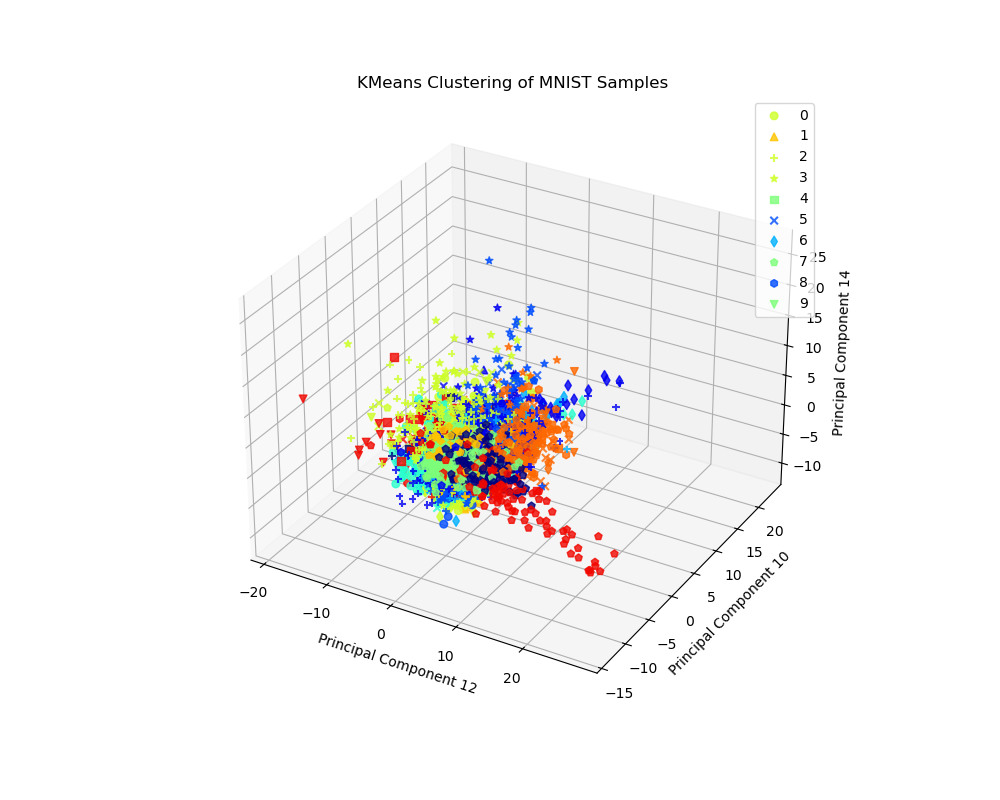

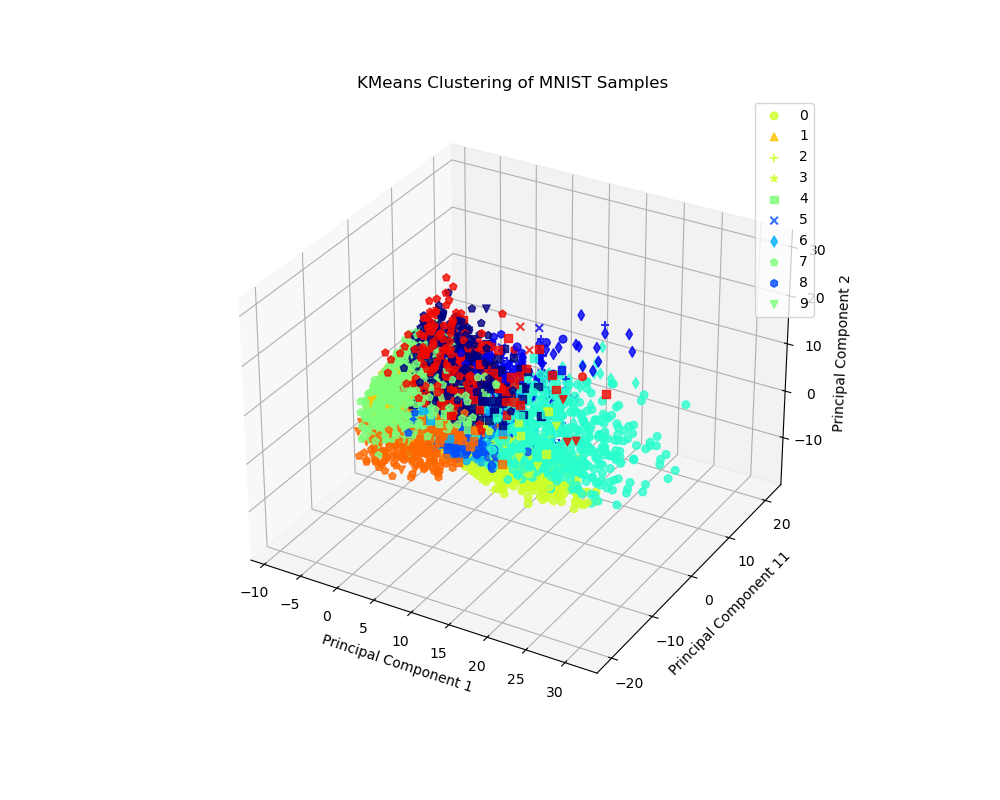

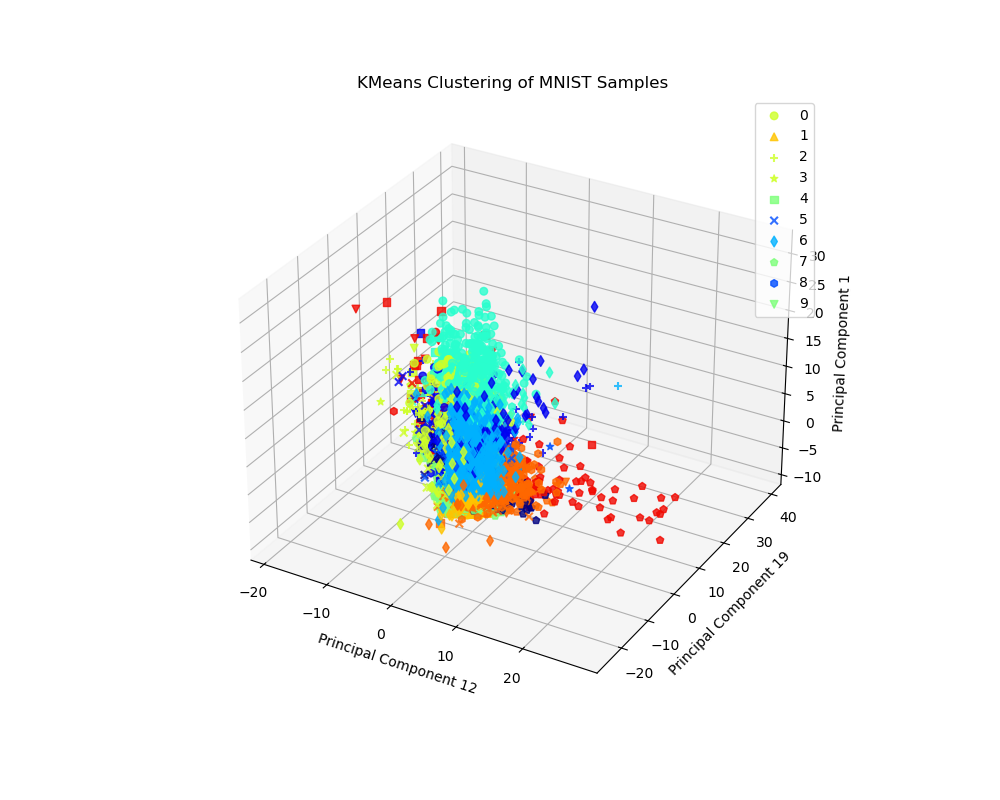

In [22]:
for _ in range(3):
    random_components = np.random.choice(20, 3)
    plot_3d_pca(sample_pca, y_sample, cluster_labels,  'KMeans Clustering of MNIST Samples', random_components)


## ROBLEM 5 : Implement Kernel PCA for Logistic Regression

### 3 circles

In [24]:
circles_df = pd.read_csv('dataset/threecircles.txt',names=['x','y','label'])
circles_df['label'].value_counts()

label
 1    334
-1    333
 0    333
Name: count, dtype: int64

In [25]:
train_3c, test_3c = train_test_split(circles_df, test_size=0.3, random_state=17)
test_3c['label'].value_counts()

label
 0    109
 1    108
-1     83
Name: count, dtype: int64

In [36]:
def lr(train_x, train_y, test_x, test_y):
    model = LogisticRegression(max_iter=1000)
    model.fit(train_x, train_y)
    pred = model.predict(test_x)
    acc = accuracy_score(test_y, pred)
    print("Accuracy of Logistic Regression: ", acc)

In [43]:
class KernelPCA:
    def __init__(self, sigma=3.0, n_components=None):
        self.sigma = sigma
        self.n_components = n_components

    def fit(self, X):
        self.X_fit_ = X
        N = X.shape[0]

        # Kernel matrix
        X2 = np.sum(X ** 2, axis=1)
        K = np.exp(-(X2[:, np.newaxis] + X2 - 2 * np.dot(X, X.T)) / self.sigma)

        # Center kernel
        U = np.ones((N, N)) / N
        Kn = K - U @ K - K @ U + U @ K @ U

        # Eigen decomposition and sort
        eigenvalues, eigenvectors = np.linalg.eigh(Kn)
        sort_idx = np.argsort(eigenvalues)[::-1]
        self.eigenvalues_ = eigenvalues[sort_idx]
        self.eigenvectors_ = eigenvectors[:, sort_idx]

        # Truncate if n_components specified
        if self.n_components is not None:
            self.eigenvalues_ = self.eigenvalues_[:self.n_components]
            self.eigenvectors_ = self.eigenvectors_[:, :self.n_components]

        # Project training data
        self.X_projected_ = Kn @ self.eigenvectors_

        # Store centering info
        self.K_fit_row_mean_ = np.mean(K, axis=0)
        self.K_fit_mean_ = np.mean(K)

        return self

    def transform(self, X_new):
        # Kernel between new and training data
        M = X_new.shape[0]
        X_new2 = np.sum(X_new ** 2, axis=1)
        X_fit2 = np.sum(self.X_fit_ ** 2, axis=1)
        K_new = np.exp(-(X_new2[:, np.newaxis] + X_fit2 - 2 * np.dot(X_new, self.X_fit_.T)) / self.sigma)

        # Center and project
        K_new_centered = (K_new - self.K_fit_row_mean_[np.newaxis, :] -
                          np.mean(K_new, axis=1)[:, np.newaxis] + self.K_fit_mean_)
        return K_new_centered @ self.eigenvectors_

    def fit_transform(self, X):
        self.fit(X)
        return self.X_projected_

In [37]:
lr( train_3c[['x','y']], train_3c['label'], test_3c[['x','y']], test_3c['label'])

Accuracy of Logistic Regression:  0.41333333333333333


In [46]:
kpca = KernelPCA(sigma=3)
kpca.fit(train_3c[['x', 'y']].values)
XG_train = kpca.transform(train_3c[['x', 'y']].values)
XG_test = kpca.transform(test_3c[['x', 'y']].values)
lr(XG_train, train_3c['label'], XG_test, test_3c['label'])

Accuracy of Logistic Regression:  1.0


### 2 spirals

In [21]:
spirals_df = pd.read_csv('dataset/twoSpirals.txt',sep='\t',names=['x','y','label'])
spirals_df['label'].value_counts()

label
-1.0    500
 1.0    500
Name: count, dtype: int64

In [48]:
train_2s, test_2s = train_test_split(spirals_df, test_size=0.3, random_state=17)
lr( train_2s[['x','y']], train_2s['label'], test_2s[['x','y']], test_2s['label'])

Accuracy of Logistic Regression:  0.65


In [49]:
kpca = KernelPCA(sigma=3)
kpca.fit(train_2s[['x', 'y']].values)
XG_train = kpca.transform(train_2s[['x', 'y']].values)
XG_test = kpca.transform(test_2s[['x', 'y']].values)
lr(XG_train, train_2s['label'], XG_test, test_2s['label'])

Accuracy of Logistic Regression:  1.0


In [50]:
pca = PCA()
pca.fit(train_2s[['x', 'y']].values)
train = pca.transform(train_2s[['x', 'y']].values)
test = pca.transform(test_2s[['x', 'y']].values)
lr(train, train_2s['label'], test, test_2s['label'])

Accuracy of Logistic Regression:  0.65
